In [201]:
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_theme()
from datetime import datetime, timedelta
import pytz

In [202]:
cotacoes = requests.get('https://economia.awesomeapi.com.br/last/USD-BRL,EUR-BRL,BTC-BRL,CAD-BRL,GBP-BRL,ARS-BRL,JPY-BRL,CHF-BRL,AUD-BRL,CNY-BRL,ILS-BRL')
cotacoes = cotacoes.json()

#@markdown  **Selecione uma moeda:**
moeda = 'Dólar Americano' #@param ['Dólar Americano', 'Euro', 'Dólar Canadense', 'Libra', 'Peso Argentino', 'Iene Japonês', 'Franco Suíço', 'Dólar Australiano', 'Yuan Chinês', 'Novo Shekel Israelense', 'Bitcoin']

if moeda == 'Dólar Americano':
  print(f'{moeda}: R$ {cotacoes["USDBRL"]["bid"]} no dia {cotacoes["USDBRL"]["create_date"]}')

if moeda == 'Euro':
  print(f'{moeda}: R$ {cotacoes["EURBRL"]["bid"]} no dia {cotacoes["EURBRL"]["create_date"]}')

if moeda == 'Bitcoin':
  print(f'{moeda}: R$ {cotacoes["BTCBRL"]["bid"]} no dia {cotacoes["BTCBRL"]["create_date"]}')

if moeda == 'Dólar Canadense':
  print(f'{moeda}: R$ {cotacoes["CADBRL"]["bid"]} no dia {cotacoes["CADBRL"]["create_date"]}')

if moeda == 'Libra':
  print(f'{moeda}: R$ {cotacoes["GBPBRL"]["bid"]} no dia {cotacoes["GBPBRL"]["create_date"]}')

if moeda == 'Peso Argentino':
  print(f'{moeda}: R$ {cotacoes["ARSBRL"]["bid"]} no dia {cotacoes["ARSBRL"]["create_date"]}')

if moeda == 'Iene Japonês':
  print(f'{moeda}: R$ {cotacoes["JPYBRL"]["bid"]} no dia {cotacoes["JPYBRL"]["create_date"]}')

if moeda == 'Franco Suíço':
  print(f'{moeda}: R$ {cotacoes["CHFBRL"]["bid"]} no dia {cotacoes["CHFBRL"]["create_date"]}')

if moeda == 'Dólar Australiano':
  print(f'{moeda}: R$ {cotacoes["AUDBRL"]["bid"]} no dia {cotacoes["AUDBRL"]["create_date"]}')

if moeda == 'Yuan Chinês':
  print(f'{moeda}: R$ {cotacoes["CNYBRL"]["bid"]} no dia {cotacoes["CNYBRL"]["create_date"]}')

if moeda == 'Novo Shekel Israelense':
  print(f'{moeda}: R$ {cotacoes["ILSBRL"]["bid"]} no dia {cotacoes["ILSBRL"]["create_date"]}')


Dólar Americano: R$ 6.1482 no dia 2024-12-16 23:13:28


In [194]:
dic_moedas = {
    'Dólar Americano': 'USD',
    'Euro': 'EUR',
    'Dólar Canadense': 'CAD',
    'Libra': 'GBP',
    'Peso Argentino': 'ARS',
    'Iene Japonês': 'JPY',
    'Franco Suíço': 'CHF',
    'Dólar Australiano': 'AUD',
    'Yuan Chinês': 'CNY',
    'Novo Shekel Israelense': 'ILS',
    'Bitcoin': 'BTC'
}

### **Variação da moeda nos últimos dias**

In [195]:
#@markdown **Selecione o período de dias:**
periodo_de_dias = 360 #@param {type: "slider", min: 1, max: 360, step: 1}



Variação no período: 25.51%


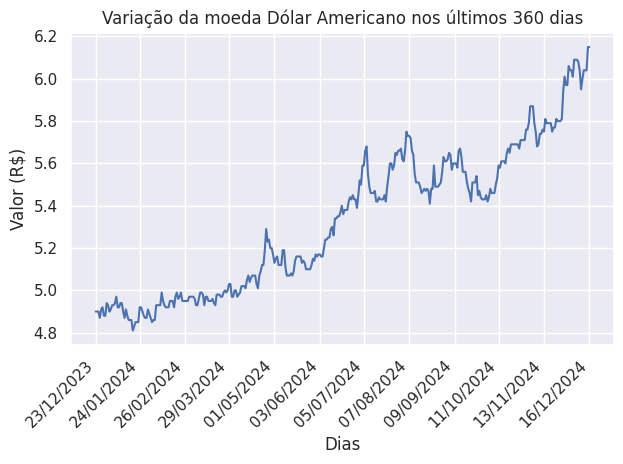

In [203]:
# Requisição para valores da moeda no período selecionado:
get_var_diaria= requests.get(f'https://economia.awesomeapi.com.br/json/daily/{dic_moedas[moeda]}-BRL/{periodo_de_dias}').json()

# Salvando valor diário em lista:
var_diaria = []

for valor in reversed(get_var_diaria): # Salvando os valores do dia atual ao dia mais antigo (por isso o reversed)
  var_diaria.append(round(float(valor['bid']),2))

#print(var_diaria)
# Variação da moeda no período selecionado:
def variacao_periodo(dia1, dia2):
  var_dias = (dia2 - dia1)/dia1
  return round(var_dias*100, 2)
print(f'Variação no período: {variacao_periodo(var_diaria[0], var_diaria[periodo_de_dias-1])}%')


### Criando valores das datas do período selecionado:
# Fuso horário do Brasil:
fuso_horario_brasil = pytz.timezone('America/Sao_Paulo')

# Data e hora atual no Brasil:
current_time = datetime.now(fuso_horario_brasil)

# Formatando data e hora:
formatted_time = current_time.strftime("%d/%m/%Y")

# Lista com todas as datas:
lista_datas = list(reversed([(current_time - timedelta(days=i)).strftime("%d/%m/%Y") for i in range(periodo_de_dias)])) # Subtrair timedelta do objeto datetime e formatar o resultado


### Plotando gráfico dos valores:
plt.plot(lista_datas, var_diaria)
plt.title(f'Variação da moeda {moeda} nos últimos {periodo_de_dias} dias')
plt.xlabel('Dias')
plt.ylabel('Valor (R$)')

# 1. Definir o número máximo de ticks (incluindo o primeiro e o último)
num_ticks = 12  # Número total de ticks desejados

# 2. Calcular os índices dos ticks para ter um intervalo aproximadamente igual
indice_ticks = np.linspace(0, len(lista_datas) - 1, num_ticks).astype(int)

# 3. Garantir que o primeiro e o último valor estejam presentes
indice_ticks[0] = 0  # Primeiro valor
indice_ticks[-1] = len(lista_datas) - 1  # Último valor

# 4. Obter os valores das datas correspondentes aos índices
ticks_datas = [lista_datas[i] for i in indice_ticks]

# 5. Definir os ticks e labels no eixo x
plt.xticks(indice_ticks, ticks_datas, rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [197]:
####

In [198]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt

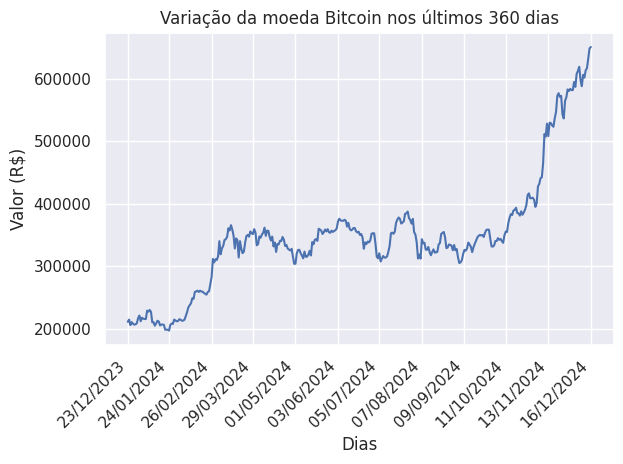

AttributeError: 'Figure' object has no attribute 'to_string'

<Figure size 640x480 with 0 Axes>

In [199]:
### Plotando gráfico dos valores:
plt.plot(lista_datas, var_diaria)
plt.title(f'Variação da moeda {moeda} nos últimos {periodo_de_dias} dias')
plt.xlabel('Dias')
plt.ylabel('Valor (R$)')

# 1. Definir o número máximo de ticks (incluindo o primeiro e o último)
num_ticks = 12  # Número total de ticks desejados

# 2. Calcular os índices dos ticks para ter um intervalo aproximadamente igual
indice_ticks = np.linspace(0, len(lista_datas) - 1, num_ticks).astype(int)

# 3. Garantir que o primeiro e o último valor estejam presentes
indice_ticks[0] = 0  # Primeiro valor
indice_ticks[-1] = len(lista_datas) - 1  # Último valor

# 4. Obter os valores das datas correspondentes aos índices
ticks_datas = [lista_datas[i] for i in indice_ticks]

# 5. Definir os ticks e labels no eixo x
plt.xticks(indice_ticks, ticks_datas, rotation=45, ha='right')

plt.tight_layout()
plt.show()

valor_especifico = var_diaria[-1] # Valor mais recente da lista var_diaria

html = f"""
 <!DOCTYPE html>
 <html>
 <head>
 <title>Dashboard</title>
 </head>
 <body>
 <h1>Valor Específico: {valor_especifico}</h1>
 {plt.gcf().to_string()}
 </body>
 </html>
 """

In [ ]:
display(HTML(html))
#plt.close() # Fecha a figura para evitar exibição duplicada


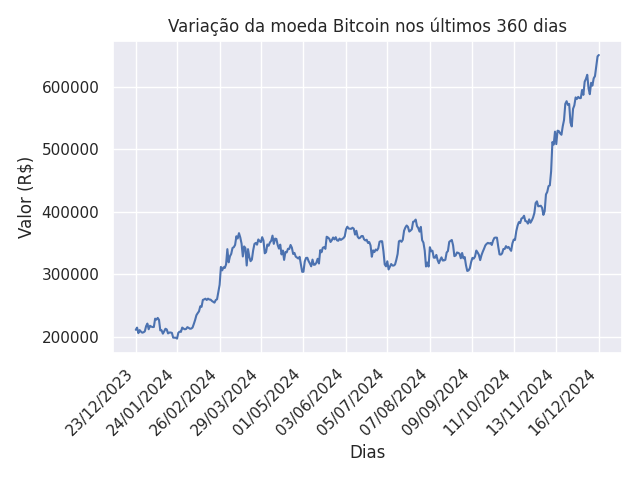

In [200]:
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import io
import base64

### Plotando gráfico dos valores:
plt.plot(lista_datas, var_diaria)
plt.title(f'Variação da moeda {moeda} nos últimos {periodo_de_dias} dias')
plt.xlabel('Dias')
plt.ylabel('Valor (R$)')

# 1. Definir o número máximo de ticks (incluindo o primeiro e o último)
num_ticks = 12  # Número total de ticks desejados

# 2. Calcular os índices dos ticks para ter um intervalo aproximadamente igual
indice_ticks = np.linspace(0, len(lista_datas) - 1, num_ticks).astype(int)

# 3. Garantir que o primeiro e o último valor estejam presentes
indice_ticks[0] = 0  # Primeiro valor
indice_ticks[-1] = len(lista_datas) - 1  # Último valor

# 4. Obter os valores das datas correspondentes aos índices
ticks_datas = [lista_datas[i] for i in indice_ticks]

# 5. Definir os ticks e labels no eixo x
plt.xticks(indice_ticks, ticks_datas, rotation=45, ha='right')

plt.tight_layout()
#plt.show() # Removing this to avoid immediate display

#valor_especifico = var_diaria[-1] # Valor mais recente da lista var_diaria

# Convert the plot to an image and embed it in the HTML
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
image_base64 = base64.b64encode(buf.read()).decode('utf-8')

html = f"""
 <!DOCTYPE html>
 <html>
 <head>
 <title>Dashboard - Variação da {moeda}</title>
 </head>
 <body>
 <h1> {moeda}: {f'R$ {cotacoes["USDBRL"]["bid"]}'}</h1>
 <h3> Dia/Hora: {cotacoes["USDBRL"]["create_date"]}</h3>
 <img src="data:image/png;base64,{image_base64}">
 </body>
 </html>
 """

display(HTML(html))
plt.close() # Fecha a figura para evitar exibição duplicada

In [ ]:
html = f"""
 <!DOCTYPE html>
 <html>
 <head>
 <title>Dashboard - Variação da {moeda}</title>
 </head>
 <body>
 <h1>Valor Específico: {valor_especifico}</h1>
 <img src="data:image/png;base64,{image_base64}">
 </body>
 </html>
 """